## Libraries Import

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

#libraries for the analysis
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer


import re
import string
import spacy
import random

from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import shuffle
from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.calibration import calibration_curve


from transformers import pipeline
from gensim.models import Word2Vec
from gensim.models import KeyedVectors



# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\UCOHUB09\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Load dataset

In [3]:
file_path = 'Reviews.csv'

# Load the dataset into a Pandas DataFrame
review = pd.read_csv(file_path, encoding='ISO-8859-1')


In [4]:
# Display the first few rows of the dataset
review.head()

,review_text,review_star,product
0,Battery life is awesome. I can use them for ho...,4.0,Earphone
1,"First off, I never really write reviews. But L...",5.0,Earphone
2,"It's stylish and beautiful, but the audio is v...",4.0,Earphone
3,The media could not be loaded.\n ...,5.0,Earphone
4,Liked it so much.good quality for the price.re...,4.0,Earphone


In [5]:
# Display the last ten rows of the dataset
review.tail(10)

,review_text,review_star,product
1846,New,5.0,Keyboards & Keypads
1847,vvv good,5.0,Keyboards & Keypads
1848,Though it does take a few moments to recognize...,5.0,Keyboards & Keypads
1849,Keyboard quality is very good. Battery life se...,5.0,Keyboards & Keypads
1850,This early generation full-size keyboard has d...,4.0,Keyboards & Keypads
1851,I purchased this beautiful keyboard because th...,5.0,Keyboards & Keypads
1852,Although this keyboard is about 10 years old n...,5.0,Keyboards & Keypads
1853,"Really like this keyboard, which still works g...",5.0,Keyboards & Keypads
1854,The keyboard that come with the new iMac is a ...,5.0,Keyboards & Keypads
1855,This is a great product for those that want a ...,5.0,Keyboards & Keypads


In [6]:
# let's view a random sample of the data
review.sample(n=10, random_state=1)

,review_text,review_star,product
462,VERY POPULAR PRODUCT GLAD WE HAVE IT.,5.0,video game
1029,"I love this camera, upgraded from the a77 to a...",5.0,camera
531,With such a large library of games buying this...,5.0,video game
1772,"The keyboard is compact, lightweight, attracti...",5.0,Keyboards & Keypads
372,If you played destiny 1 and liked the gameplay...,5.0,video game
1680,"smooth keyboard, mouse is, er well a mouse, bu...",5.0,Keyboards & Keypads
241,"Fast and Lots of storage, not a flimsy card ei...",5.0,memory card
464,Well made product. I personally like the desig...,4.0,video game
1428,i think phillps monitor is better picture and ...,3.0,Monitors
1435,The product is just awesome,5.0,Monitors


### Basic Data Exploration

In [7]:
# checking shape of the data
print(f"There are {review.shape[0]} rows and {review.shape[1]} columns.")

There are 1856 rows and 3 columns.


In [8]:
# Display basic information about the dataset
review.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1856 entries, 0 to 1855
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   review_text  1849 non-null   object 
 1   review_star  1853 non-null   float64
 2   product      1853 non-null   object 
dtypes: float64(1), object(2)
memory usage: 43.6+ KB


In [9]:
# copying the data to another variable to avoid any changes to original data
review_copy = review.copy()

In [10]:
#check for duplicated rows
review.duplicated().sum()

12

In [11]:
#drop duplicated rows
review.drop_duplicates(inplace=True)

In [12]:
#check if there's still duplicated rows
review.duplicated().sum()

0

In [13]:
# checking for missing values in the data
review.isna().sum()

review_text    2
review_star    1
product        1
dtype: int64

In [14]:
#drop NAN values
review.dropna(inplace=True)


In [15]:
# checking if there is still missing values in the data
review.isna().sum()

review_text    0
review_star    0
product        0
dtype: int64

In [16]:
# checking new shape of the data
print(f"There are now {review.shape[0]} rows and {review.shape[1]} columns.")

There are now 1842 rows and 3 columns.


In [17]:
# Display descriptive statistics
review.describe()


,review_star
count,1842.000000
mean,4.671553
std,0.861479
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


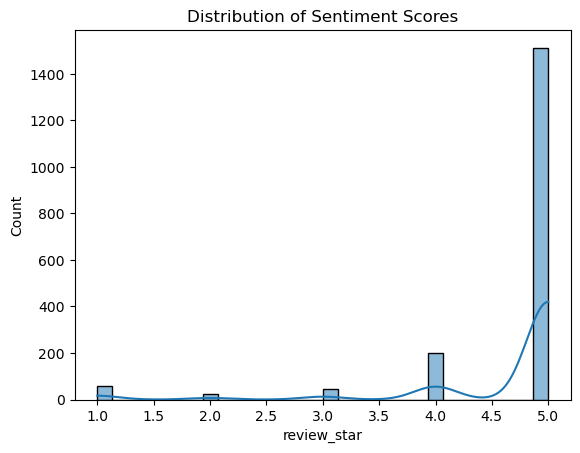

In [18]:
# Visualize the distribution of sentiment
sns.histplot(review['review_star'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.show()

In [19]:
# count of rating
review['review_star'].value_counts().sort_index(ascending=False)

5.0    1512
4.0     200
3.0      45
2.0      25
1.0      60
Name: review_star, dtype: int64

In [20]:
# Average sentiment per product
average_sentiment_per_product = review.groupby('product')['review_star'].mean()

# Display the average sentiment per product
print(average_sentiment_per_product)

product
Earphone               4.388889
Keyboards & Keypads    4.795000
Monitors               4.757085
Screen                 4.315789
camera                 4.768293
computer               3.916667
memory card            4.515000
video game             4.762000
Name: review_star, dtype: float64


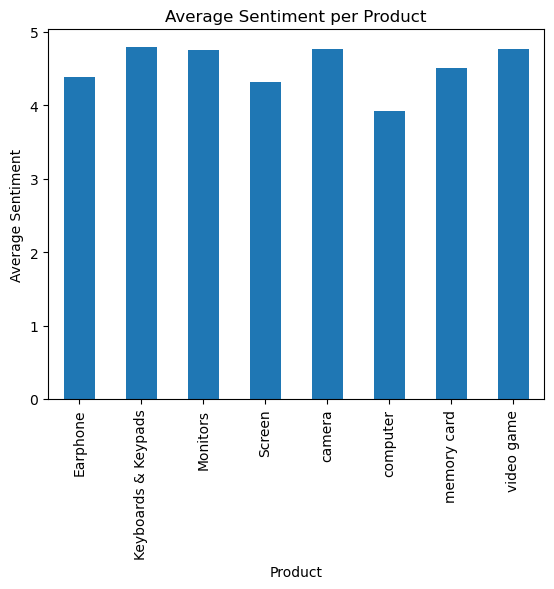

In [21]:
#Visualize average sentiment per product
average_sentiment_per_product.plot(kind='bar')
plt.title('Average Sentiment per Product')
plt.xlabel('Product')
plt.ylabel('Average Sentiment')
plt.show()


In [22]:
# function to create labeled barplots


def labeled_barplot(review, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(review[feature])  # length of the column
    count = review[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=review,
        x=feature,
        palette="Paired",
        order=review[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

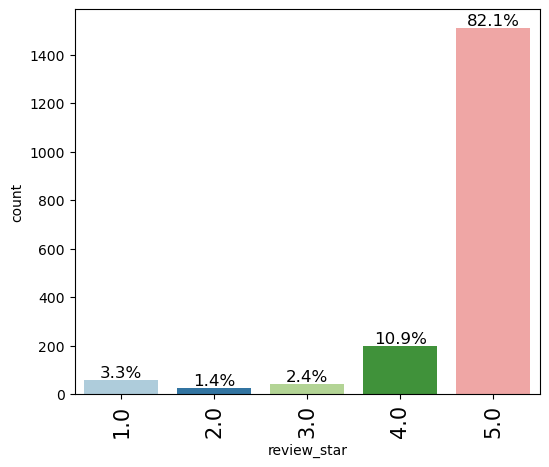

In [23]:
#plot of ratings
labeled_barplot(review, 'review_star', perc=True)

#### Rating of 5 has the highest percentage (82.1%)

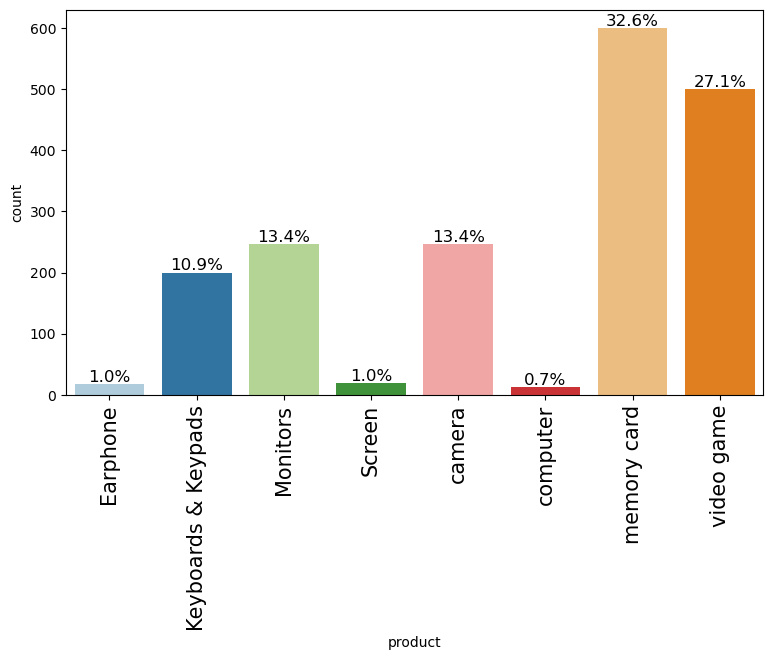

In [24]:
#plot of products
labeled_barplot(review, 'product', perc=True)

### We will now map the ratings. Ratings 1,2 and 3 will be given value 0 (Negative) while ratings 4 and 5 will be tagged 1 (Positive)

In [25]:
# map ratings
sentiment_score = {1: 0,
                   2: 0,
                   3: 0,
                   4: 1,
                   5: 1}

sentiment = {0: 'NEGATIVE',
             1: 'POSITIVE'}


# mapping
review['sentiment_score'] = review['review_star'].map(sentiment_score)
review['sentiment'] = review['sentiment_score'].map(sentiment)

review.head()

,review_text,review_star,product,sentiment_score,sentiment
0,Battery life is awesome. I can use them for ho...,4.0,Earphone,1,POSITIVE
1,"First off, I never really write reviews. But L...",5.0,Earphone,1,POSITIVE
2,"It's stylish and beautiful, but the audio is v...",4.0,Earphone,1,POSITIVE
3,The media could not be loaded.\n ...,5.0,Earphone,1,POSITIVE
4,Liked it so much.good quality for the price.re...,4.0,Earphone,1,POSITIVE


In [26]:
#count of sentiment score
sentiment_counts = review['sentiment_score'].value_counts()

print (sentiment_counts)

1    1712
0     130
Name: sentiment_score, dtype: int64


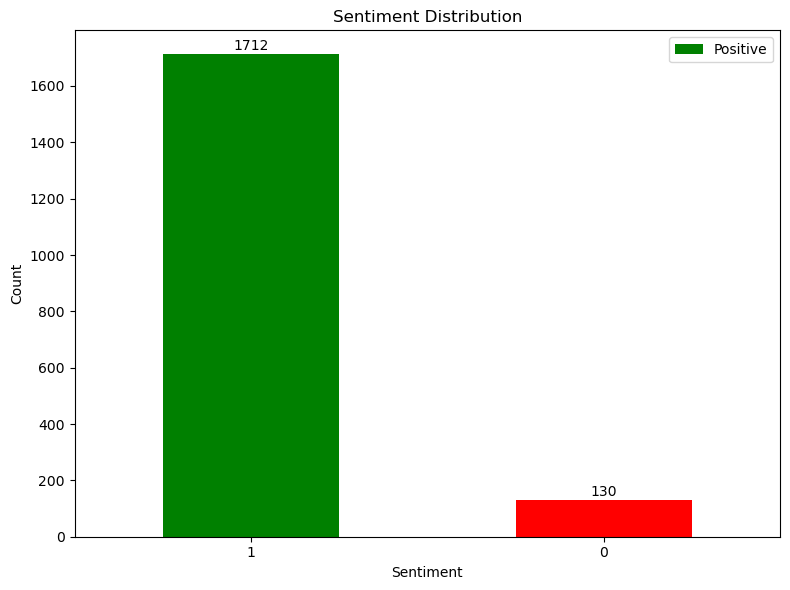

In [27]:
# Plotting using a bar chart
plt.figure(figsize=(8, 6))

colors = ['#008000', '#FF0000']
sentiment_counts.plot(kind='bar', color=colors)

plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Show the count values on top of the bars
for index, value in enumerate(sentiment_counts):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')

plt.xticks(rotation=0)  # rotate x-axis labels
plt.legend(labels=['Positive', 'Negative'])

plt.tight_layout()
plt.show()


### We will now check most used words

#### 1. Positive Reviews

In [28]:
# The most used words in positive reviews
positiveWords = pd.Series(' '.join(review[review['sentiment']=='POSITIVE']['review_text']).split())

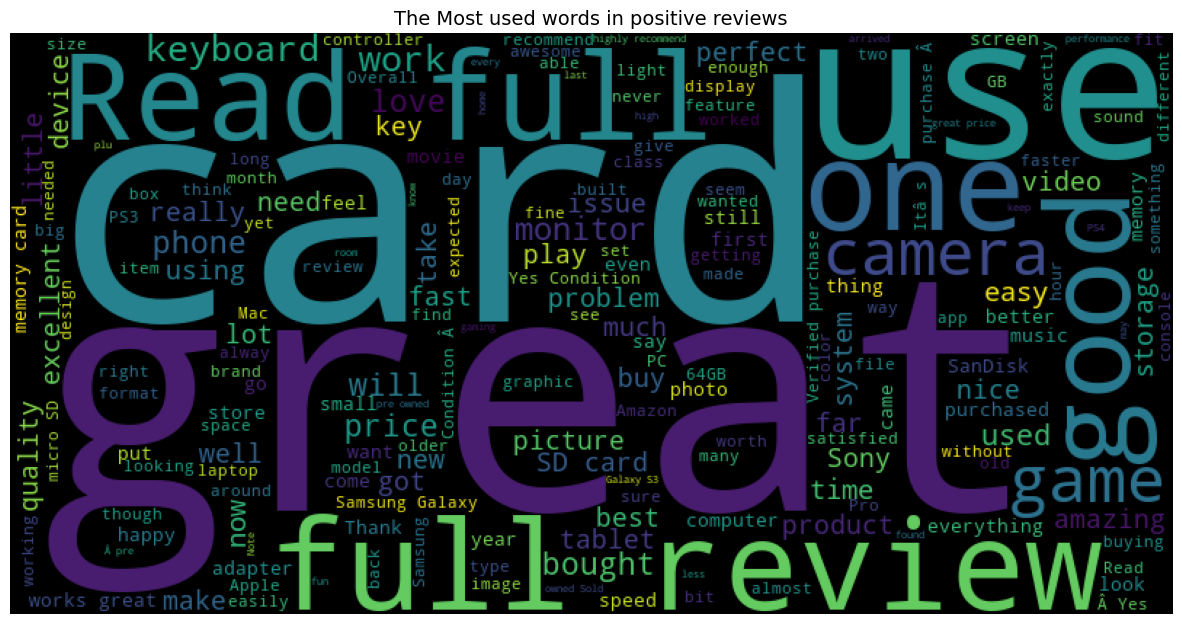

In [29]:
# plot  the word cloud
wordcloud = WordCloud(width = 800, height = 400).generate(' '.join(positiveWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("The Most used words in positive reviews", size=14)

plt.axis("off")
plt.show()

#### 2. Negative Reviews

In [30]:
# The most used words in negative reviews
NegativeWords = pd.Series(' '.join(review[review['sentiment']=='NEGATIVE']['review_text']).split())

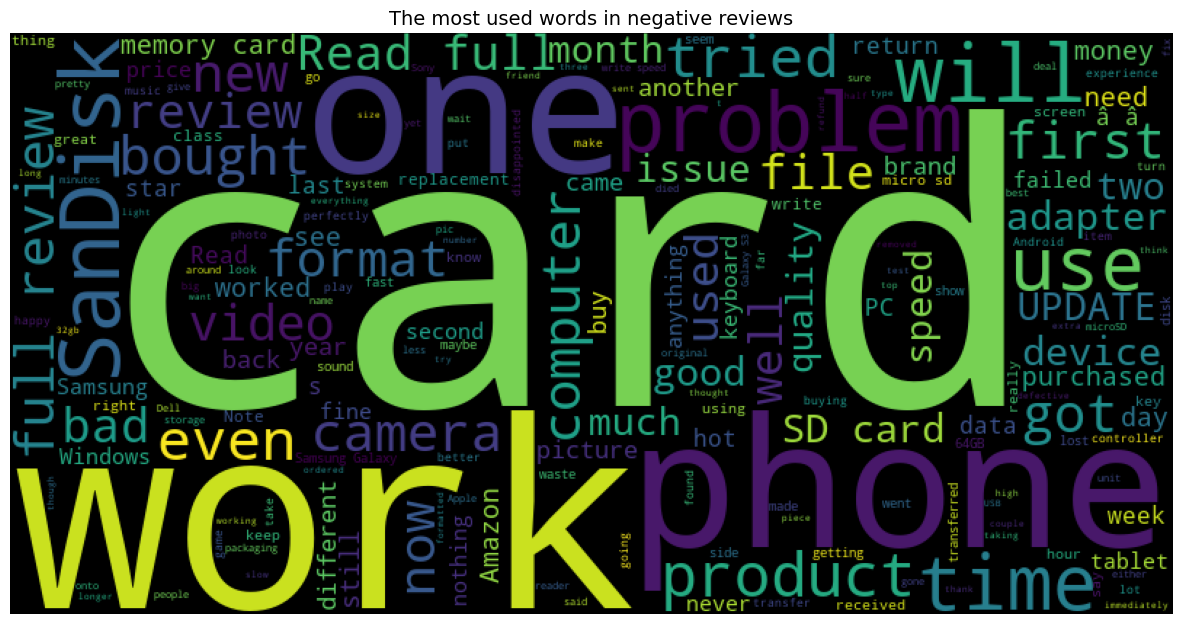

In [31]:
# plot word cloud
wordcloud = WordCloud(width = 800, height = 400).generate(' '.join(NegativeWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("The most used words in negative reviews", size=14)

plt.axis("off")
plt.show()

#### 3. Positive and Negative Words Combination

In [32]:
# get all words 
all_words = pd.Series(' '.join(review['review_text']).split())

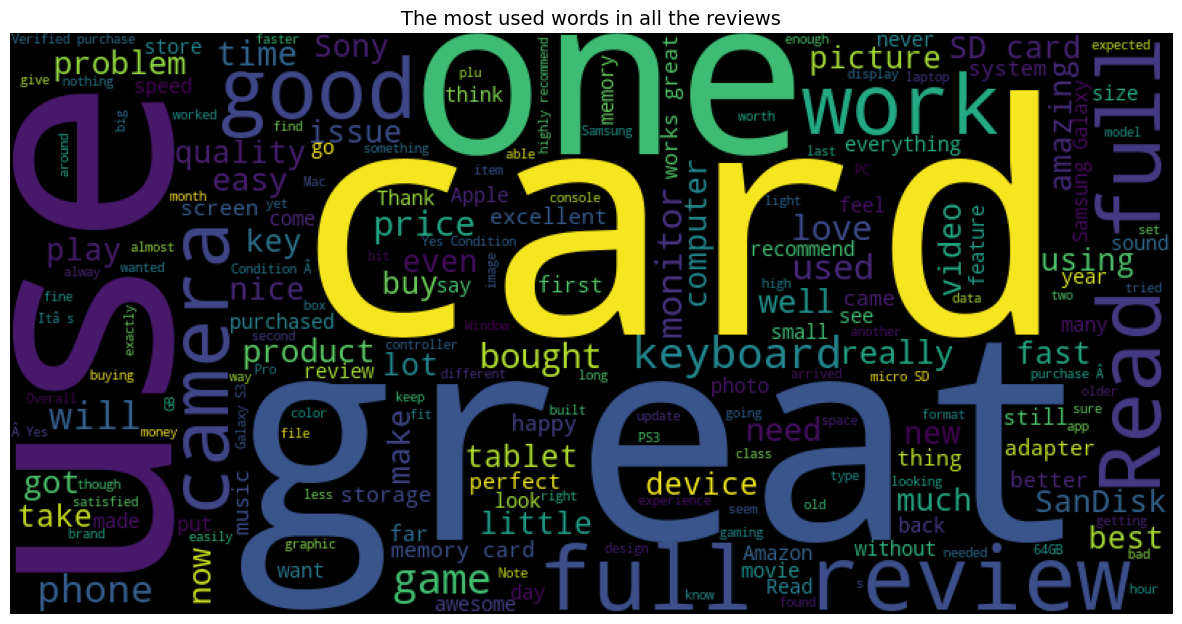

In [33]:
# word cloud plot
wordcloud = WordCloud(width = 800, height = 400).generate(' '.join(all_words))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("The most used words in all the reviews", size=14)

plt.axis("off")
plt.show()

## Data Preprocessing for Modelling

In [34]:
review

,review_text,review_star,product,sentiment_score,sentiment
0,Battery life is awesome. I can use them for ho...,4.0,Earphone,1,POSITIVE
1,"First off, I never really write reviews. But L...",5.0,Earphone,1,POSITIVE
2,"It's stylish and beautiful, but the audio is v...",4.0,Earphone,1,POSITIVE
3,The media could not be loaded.\n ...,5.0,Earphone,1,POSITIVE
4,Liked it so much.good quality for the price.re...,4.0,Earphone,1,POSITIVE
...,...,...,...,...,...
1851,I purchased this beautiful keyboard because th...,5.0,Keyboards & Keypads,1,POSITIVE
1852,Although this keyboard is about 10 years old n...,5.0,Keyboards & Keypads,1,POSITIVE
1853,"Really like this keyboard, which still works g...",5.0,Keyboards & Keypads,1,POSITIVE
1854,The keyboard that come with the new iMac is a ...,5.0,Keyboards & Keypads,1,POSITIVE


In [35]:
review

,review_text,review_star,product,sentiment_score,sentiment
0,Battery life is awesome. I can use them for ho...,4.0,Earphone,1,POSITIVE
1,"First off, I never really write reviews. But L...",5.0,Earphone,1,POSITIVE
2,"It's stylish and beautiful, but the audio is v...",4.0,Earphone,1,POSITIVE
3,The media could not be loaded.\n ...,5.0,Earphone,1,POSITIVE
4,Liked it so much.good quality for the price.re...,4.0,Earphone,1,POSITIVE
...,...,...,...,...,...
1851,I purchased this beautiful keyboard because th...,5.0,Keyboards & Keypads,1,POSITIVE
1852,Although this keyboard is about 10 years old n...,5.0,Keyboards & Keypads,1,POSITIVE
1853,"Really like this keyboard, which still works g...",5.0,Keyboards & Keypads,1,POSITIVE
1854,The keyboard that come with the new iMac is a ...,5.0,Keyboards & Keypads,1,POSITIVE


In [36]:
review_copy_2 = review.copy()

In [37]:
# We don't need the product column so we will drop it
review.drop(["product"], axis = 1)


,review_text,review_star,sentiment_score,sentiment
0,Battery life is awesome. I can use them for ho...,4.0,1,POSITIVE
1,"First off, I never really write reviews. But L...",5.0,1,POSITIVE
2,"It's stylish and beautiful, but the audio is v...",4.0,1,POSITIVE
3,The media could not be loaded.\n ...,5.0,1,POSITIVE
4,Liked it so much.good quality for the price.re...,4.0,1,POSITIVE
...,...,...,...,...
1851,I purchased this beautiful keyboard because th...,5.0,1,POSITIVE
1852,Although this keyboard is about 10 years old n...,5.0,1,POSITIVE
1853,"Really like this keyboard, which still works g...",5.0,1,POSITIVE
1854,The keyboard that come with the new iMac is a ...,5.0,1,POSITIVE


### Text Cleaning

In [38]:
# Function for text preprocessing
def preprocess_text(text):
    # Lowercasing text
    text = text.lower()
    
    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    
    # Joining tokens back to text
    cleaned_text = ' '.join(stemmed_tokens)
    return cleaned_text

# Applying the preprocessing function to the 'review_text' column
review['cleaned_text'] = review['review_text'].apply(preprocess_text)

In [39]:
# Displaying the DataFrame with cleaned text
review

,review_text,review_star,product,sentiment_score,sentiment,cleaned_text
0,Battery life is awesome. I can use them for ho...,4.0,Earphone,1,POSITIVE,batteri life awesom use hour without charg sup...
1,"First off, I never really write reviews. But L...",5.0,Earphone,1,POSITIVE,first never realli write review let share boug...
2,"It's stylish and beautiful, but the audio is v...",4.0,Earphone,1,POSITIVE,stylish beauti audio poor whenev im use peopl ...
3,The media could not be loaded.\n ...,5.0,Earphone,1,POSITIVE,media could load â got wife want get inspir so...
4,Liked it so much.good quality for the price.re...,4.0,Earphone,1,POSITIVE,like muchgood qualiti pricerecommend
...,...,...,...,...,...,...
1851,I purchased this beautiful keyboard because th...,5.0,Keyboards & Keypads,1,POSITIVE,purchas beauti keyboard chiclet style keyboard...
1852,Although this keyboard is about 10 years old n...,5.0,Keyboards & Keypads,1,POSITIVE,although keyboard 10 year old appl wireless ke...
1853,"Really like this keyboard, which still works g...",5.0,Keyboards & Keypads,1,POSITIVE,realli like keyboard still work great appl dev...
1854,The keyboard that come with the new iMac is a ...,5.0,Keyboards & Keypads,1,POSITIVE,keyboard come new imac joke light flimsi absol...


In [40]:
# check some processed reviews

i = random.choice(range(len(review)))

print(f"Original review: \n{review['review_text'].iloc[i]}\n")
print(f"Processed review: \n{review['cleaned_text'].iloc[i]}")      

Original review: 
I had no issue using this with all of the above devices. It is still working strong and I trust SanDisk with all my gear including memory for DSLR use. Had not malfunctioned throughout many different uses and I trust this brand. Although it is more expensive as supposed to other brands, but they are worth extra in my opinion.

Processed review: 
issu use devic still work strong trust sandisk gear includ memori dslr use malfunct throughout mani differ use trust brand although expens suppos brand worth extra opinion


In [41]:
# export cleaned data to csv
review.to_csv('cleaned_text.csv', index=False)

In [42]:
cleaned_review = review.copy()

In [43]:
cleaned_review

,review_text,review_star,product,sentiment_score,sentiment,cleaned_text
0,Battery life is awesome. I can use them for ho...,4.0,Earphone,1,POSITIVE,batteri life awesom use hour without charg sup...
1,"First off, I never really write reviews. But L...",5.0,Earphone,1,POSITIVE,first never realli write review let share boug...
2,"It's stylish and beautiful, but the audio is v...",4.0,Earphone,1,POSITIVE,stylish beauti audio poor whenev im use peopl ...
3,The media could not be loaded.\n ...,5.0,Earphone,1,POSITIVE,media could load â got wife want get inspir so...
4,Liked it so much.good quality for the price.re...,4.0,Earphone,1,POSITIVE,like muchgood qualiti pricerecommend
...,...,...,...,...,...,...
1851,I purchased this beautiful keyboard because th...,5.0,Keyboards & Keypads,1,POSITIVE,purchas beauti keyboard chiclet style keyboard...
1852,Although this keyboard is about 10 years old n...,5.0,Keyboards & Keypads,1,POSITIVE,although keyboard 10 year old appl wireless ke...
1853,"Really like this keyboard, which still works g...",5.0,Keyboards & Keypads,1,POSITIVE,realli like keyboard still work great appl dev...
1854,The keyboard that come with the new iMac is a ...,5.0,Keyboards & Keypads,1,POSITIVE,keyboard come new imac joke light flimsi absol...


In [44]:
#check for missing data
cleaned_review.isna().sum()

review_text        0
review_star        0
product            0
sentiment_score    0
sentiment          0
cleaned_text       0
dtype: int64

### We will create TF-IDF
TF-IDF stands for Term Frequency-Inverse Document Frequency. It's a numerical statistic used in information retrieval and text mining to measure the importance of a word in a document relative to a collection of documents (corpus).

In [45]:
#Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=800)
# Fit the vectorizer
vectorizer.fit(cleaned_review['cleaned_text'])
features = vectorizer.transform(cleaned_review['cleaned_text'])

features.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.09684983, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [46]:
#create a dataframe
cleaned_review_df = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names_out())
cleaned_review_df.head()

,10,100,101,1080p,16gb,20,30,32,32gb,360,4gb,4k,50,60,64,64gb,a7,abl,absolut,accept,access,across,action,actual,ad,adapt,add,addit,adjust,advertis,afford,ago,allow,almost,alreadi,also,although,aluminum,alway,amaz,amazon,amount,android,angl,anoth,anyon,anyth,anywher,app,appl,applic,arent,around,arriv,ask,asu,audio,auto,avail,away,awesom,back,backlight,backup,bad,base,basic,batteri,beat,beauti,believ,best,better,big,bigger,bit,black,blue,bluetooth,bluray,bodi,boot,bought,box,brand,bright,buck,bud,build,built,builtin,bundl,busi,button,buy,byâ,cabl,call,came,camera,cameraread,canon,cant,canâ,capabl,capac,card,care,carri,case,caus,cell,chang,charact,charg,cheap,cheaper,check,chip,choic,christma,class,classic,clean,clear,close,color,come,comfort,commun,compact,compar,compat,complain,complaint,complet,comput,con,condit,conditionâ,connect,consid,consol,contact,content,continu,control,conveni,cool,copi,cord,corrupt,cost,could,couldnt,coupl,cours,cover,crazi,crisp,current,curv,custom,cut,damag,data,day,de,dead,deal,decent,decid,defect,definit,delet,deliv,deliveri,dell,describ,descript,design,desk,desktop,destini,detail,devic,didnt,didnâ,die,differ,difficult,digit,directli,disappoint,disk,display,doesnt,done,dont,donâ,doubl,download,drive,drop,dslr,due,dvd,ear,earbud,earlier,easi,easier,easili,ebay,edit,either,els,en,end,enjoy,enough,entir,ergonom,error,especi,etc,even,ever,everi,everyon,everyth,exactli,excel,except,excit,exclus,expand,expect,expens,experi,extend,extern,extra,extrem,eye,fact,fail,fairli,fall,famili,fantast,far,fast,faster,fat32,favorit,featur,feel,figur,file,fill,final,find,fine,finger,first,fit,fix,flash,flat,flawlessli,focu,forev,format,forward,found,frame,free,friend,frustrat,full,fun,function,galaxi,game,gameplay,gb,gener,get,gift,gig,give,given,glad,go,goe,gone,good,googl,gopro,got,gp,graphic,great,guess,guy,half,hand,happen,happi,hard,hasnt,havent,hd,hdmi,headphon,hear,heavi,help,high,higher,highli,hit,hold,home,hook,hope,hot,hour,howev,huge,id,ii,ill,im,imac,imag,immedi,import,impress,improv,inch,includ,increas,incred,inform,insert,insid,instal,instantli,instead,instruct,intend,interest,interfac,intern,internet,ipad,iphon,isnt,iso,issu,item,itread,itâ,ive,iâ,job,keep,key,keyboard,kid,kind,knew,know,lag,laptop,larg,larger,last,later,latest,learn,least,led,left,len,lens,less,let,level,lg,life,light,lightweight,like,limit,line,list,listen,littl,load,local,long,longer,look,lose,lost,lot,love,low,ludo,mac,macbook,machin,made,magic,main,make,mani,manual,market,matter,may,mayb,mb,mean,media,memori,menu,micro,microsd,microsdxc,might,mind,mine,mini,minut,mirrorless,miss,mobil,mode,model,money,monitor,month,mostli,mount,mous,move,movi,mp3,much,multipl,music,must,name,near,need,never,new,newer,next,nice,night,nikon,nintendo,none,note,noth,notic,number,offer,often,ok,old,older,one,oneread,onlin,onto,open,oper,opinion,option,order,origin,os,other,otherwis,overal,own,pack,packag,pad,paid,pain,pair,part,past,pay,pc,peopl,per,perfect,perfectli,perform,person,phone,photo,photographi,pic,pick,pictur,piec,place,plan,plastic,play,player,playstat,pleas,plenti,plu,plug,pocket,point,poor,pop,port,portabl,posit,possibl,post,power,prefer,preown,press,pretti,previou,price,pro,probabl,problem,process,product,profession,profil,program,promis,properli,provid,ps,ps2,ps3,ps4,ps5,purchas,purchaseâ,purpos,push,put,qualiti,quick,quickli,quit,rang,rate,rather,raw,reach,read,reader,real,realli,reason,receiv,recent,recharg,recogn,recommend,record,reformat,refurbish,regret,reliabl,rememb,remot,remov,replac,report,requir,research,resolut,respons,rest,result,retail,return,review,right,rock,room,run,s3,s4,said,sale,samsung,san,sandisk,satisfi,save,say,scratch,screen,sd,sdhc,sdxc,search,second,see,seem,seen,select,sell,seller,sent,separ,servic,set,setup,sever,shape,sharp,ship,shoot,short,shot,show,side,similar,simpl,simpli,sinc,size,slightli,slim,slot,slow,slower,small,smaller,smart,smartphon,smooth,softwar,sold,solid,solut,someon,someth,sometim,son,song,

In [47]:
cleaned_review_df.columns

Index(['10', '100', '101', '1080p', '16gb', '20', '30', '32', '32gb', '360',
       ...
       'wouldnt', 'write', 'wrong', 'xbox', 'ye', 'year', 'yet', 'youll',
       'your', 'zoom'],
      dtype='object', length=800)

In [48]:
labels = cleaned_review['sentiment']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(cleaned_review_df, labels, test_size=0.2, random_state=42)

# X_train: Training features
# X_test: Testing features
# y_train: Training labels
# y_test: Testing labels
# test_size: Percentage of the data to be used for testing (0.2 means 20% for testing)
# random_state: A seed for reproducing the same split

In [49]:
#transform  categorical labels into a binary format
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)


## Model Building

#### Logistic Regression

In [50]:
# Initialize and train model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [51]:
# Predict sentiment labels
logreg_preds = logreg_model.predict(X_test)

In [52]:
#evaluate accuracy

positive_class = 'POSITIVE'

logreg_accuracy = accuracy_score(y_test, logreg_preds)
logreg_precision = precision_score(y_test, logreg_preds, pos_label=positive_class)
logreg_recall = recall_score(y_test, logreg_preds, pos_label=positive_class)
logreg_f1 = f1_score(y_test, logreg_preds, pos_label=positive_class)


print(f"Logreg Accuracy: {logreg_accuracy}")
print(f"Precision: {logreg_precision}")
print(f"Recall: {logreg_recall}")
print(f"F1-score: {logreg_f1}")

Logreg Accuracy: 0.9376693766937669
Precision: 0.9376693766937669
Recall: 1.0
F1-score: 0.9678321678321679


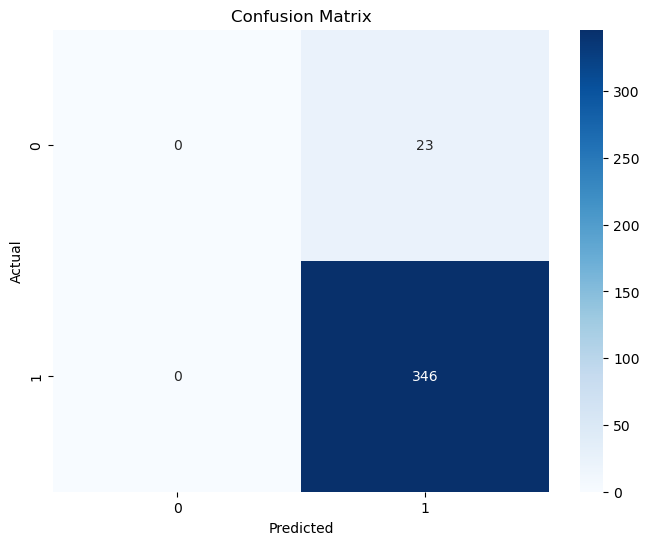

In [53]:
# confusion matrix
cm = confusion_matrix(y_test, logreg_preds)


# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [54]:
# Obtain probabilities
logreg_preds = logreg_model.predict_proba(X_test)[:, 0]


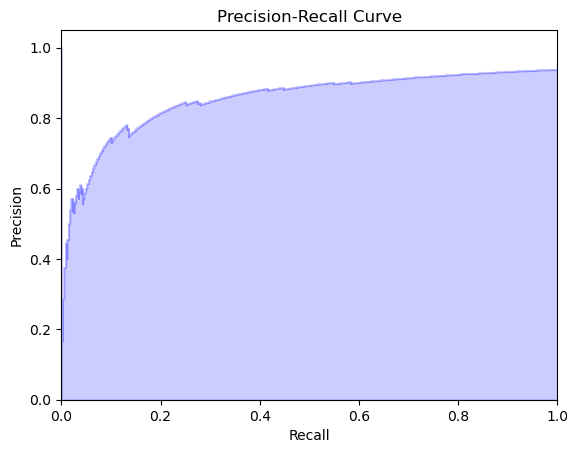

In [55]:
precision, recall, thresholds = precision_recall_curve(y_test, logreg_preds, pos_label=positive_class)

plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()

#### SVM (Support Vector Machines)

In [56]:
# Initialize and train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [57]:
# Predict sentiment labels
svm_preds = svm_model.predict(X_test)


In [58]:
# Evaluate accuracy

positive_class = 'POSITIVE'

svm_accuracy = accuracy_score(y_test, svm_preds)
svm_precision = precision_score(y_test, svm_preds, pos_label=positive_class)
svm_recall = recall_score(y_test, svm_preds, pos_label=positive_class)
svm_f1 = f1_score(y_test, svm_preds, pos_label=positive_class)


print(f"SVM Accuracy: {svm_accuracy}")
print(f"Precision: {svm_precision}")
print(f"Recall: {svm_recall}")
print(f"F1-score: {svm_f1}")

SVM Accuracy: 0.9322493224932249
Precision: 0.9397260273972603
Recall: 0.9913294797687862
F1-score: 0.9648382559774965


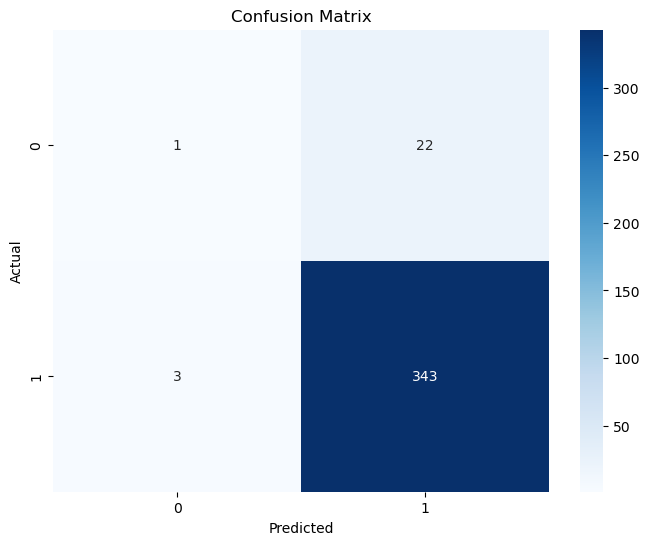

In [59]:
# confusion matrix
cm = confusion_matrix(y_test, svm_preds)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Random Forest

In [60]:
# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [61]:
# Predict sentiment labels
rf_preds = rf_model.predict(X_test)

In [62]:
# Evaluate accuracy
positive_class = 'POSITIVE'


rf_accuracy = accuracy_score(y_test, rf_preds)
rf_precision = precision_score(y_test, rf_preds, pos_label=positive_class)
rf_recall = recall_score(y_test, rf_preds, pos_label=positive_class)
rf_f1 = f1_score(y_test, rf_preds, pos_label=positive_class)


print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1-score: {rf_f1}")


Random Forest Accuracy: 0.9376693766937669
Precision: 0.9400544959128065
Recall: 0.9971098265895953
F1-score: 0.967741935483871


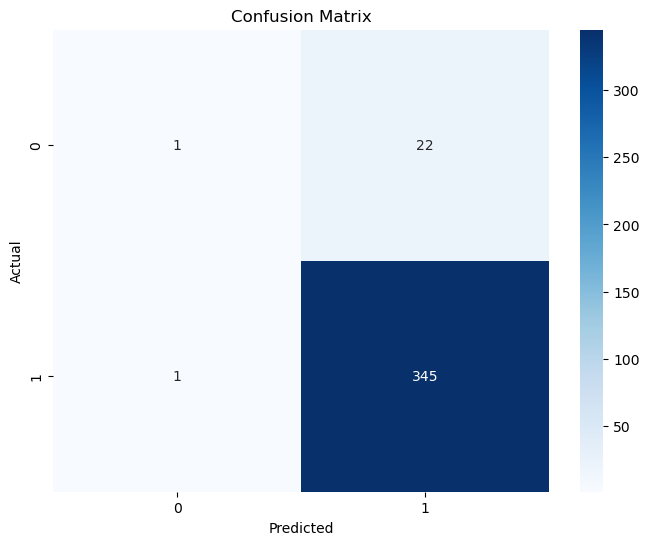

In [63]:
# confusion matrix
cm = confusion_matrix(y_test, rf_preds)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Naive Bayes

In [64]:
# Initialize and train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [65]:
# Predict sentiment labels
nb_preds = nb_model.predict(X_test)

In [66]:
# Evaluate accuracy

positive_class = 'POSITIVE'

nb_accuracy = accuracy_score(y_test, nb_preds)
nb_precision = precision_score(y_test, nb_preds, pos_label=positive_class)
nb_recall = recall_score(y_test, nb_preds, pos_label=positive_class)
nb_f1 = f1_score(y_test, nb_preds, pos_label=positive_class)


print(f"Naive Bayes Accuracy: {nb_accuracy}")
print(f"Precision: {nb_precision}")
print(f"Recall: {nb_recall}")
print(f"F1-score: {nb_f1}")

Naive Bayes Accuracy: 0.9376693766937669
Precision: 0.9376693766937669
Recall: 1.0
F1-score: 0.9678321678321679


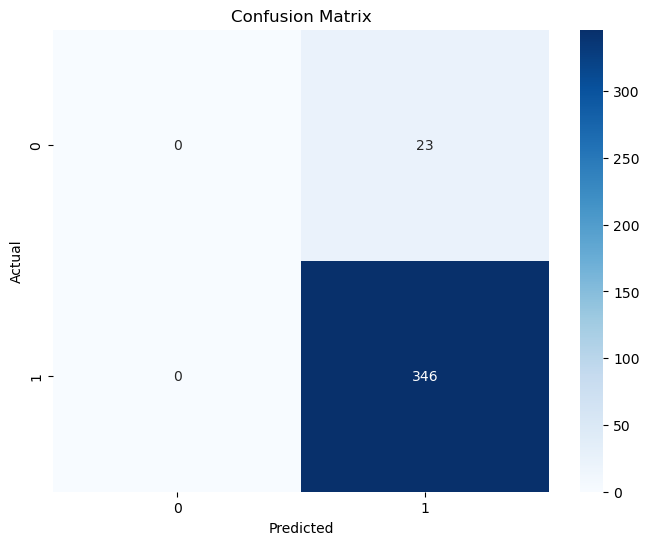

In [67]:
# confusion matrix
cm = confusion_matrix(y_test, nb_preds)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()